<a href="https://colab.research.google.com/github/vladgnez0/trips_data/blob/main/_trips_data_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("t_data.xlsx") #, index_col="Unnamed: 0")
df.head() 

,Unnamed: 0,salary,city,age,vacation_preference,transport_preference,family_members,target
0,0.0,196000.0,Краснодар,25.0,Шоппинг,Автомобиль,1.0,New York
1,1.0,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0,London
2,2.0,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0,Sydney
3,3.0,161000.0,Краснодар,41.0,Шоппинг,Автомобиль,0.0,New York
4,4.0,146000.0,Краснодар,58.0,Архитектура,Самолет,1.0,Sydney


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   float64
 1   salary                1000 non-null   float64
 2   city                  1000 non-null   object 
 3   age                   1000 non-null   float64
 4   vacation_preference   1000 non-null   object 
 5   transport_preference  1000 non-null   object 
 6   family_members        1000 non-null   float64
 7   target                1000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


<AxesSubplot:>

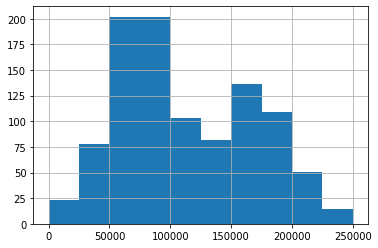

In [ ]:
df["salary"].hist()

In [ ]:
df["city"].value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Ярославль         1
Москва            1
Name: city, dtype: int64

<AxesSubplot:>

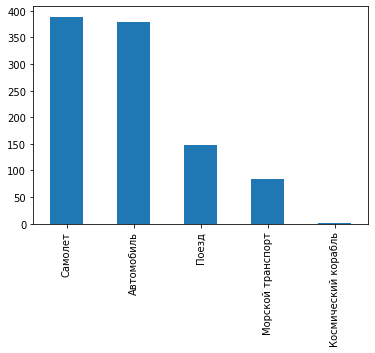

In [ ]:
df["transport_preference"].value_counts().plot(kind="bar")

In [ ]:
df["salary"].describe()

count      1000.000000
mean     111935.000000
std       54580.049073
min           0.000000
25%       68000.000000
50%       99000.000000
75%      161000.000000
max      250000.000000
Name: salary, dtype: float64

In [ ]:
df.groupby("city")["salary"].min()

city
Екатеринбург     58000.0
Киев             12000.0
Краснодар            0.0
Минск             9000.0
Москва          206000.0
Новосибирск      57000.0
Омск             83000.0
Петербург       146000.0
Томск             2000.0
Хабаровск         8000.0
Ярославль        32000.0
Name: salary, dtype: float64

In [ ]:
df.groupby("transport_preference")["salary"].mean()

transport_preference
Автомобиль              98430.079156
Космический корабль    161000.000000
Морской транспорт      121759.036145
Поезд                   96939.189189
Самолет                128575.835476
Name: salary, dtype: float64

In [ ]:
df.groupby("transport_preference")["age"].mean()

transport_preference
Автомобиль             51.965699
Космический корабль    63.000000
Морской транспорт      55.891566
Поезд                  49.952703
Самолет                60.203085
Name: age, dtype: float64

In [ ]:
df = pd.get_dummies(df, columns=["city", "vacation_preference","transport_preference"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1000 non-null   float64
 1   salary                                    1000 non-null   float64
 2   age                                       1000 non-null   float64
 3   family_members                            1000 non-null   float64
 4   target                                    1000 non-null   object 
 5   city_Екатеринбург                         1000 non-null   uint8  
 6   city_Киев                                 1000 non-null   uint8  
 7   city_Краснодар                            1000 non-null   uint8  
 8   city_Минск                                1000 non-null   uint8  
 9   city_Москва                               1000 non-null   uint8  
 10  city_Новосибирск                     

In [ ]:
X = df.drop(["target", "Unnamed: 0"], axis=1)
Y = df["target"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators= 200)
model.fit(X, Y) # обучение модели

RandomForestClassifier(n_estimators=200)

In [ ]:
{ col: [0] for col in X.columns }

{'salary': [0],
 'age': [0],
 'family_members': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0]}

In [ ]:
example = {'age': [32],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [1],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [100000],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [1],
 'vacation_preference_Архитектура': [1],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

In [ ]:
example_df = pd.DataFrame(example)
example_df

,age,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,city_Петербург,city_Томск,...,salary,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг
0,32,0,0,1,0,0,0,0,0,0,...,100000,0,0,0,0,1,1,0,0,0


In [ ]:
# X.info()

In [ ]:
# df.head(15)

In [ ]:
model.predict(example_df)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array(['Paris'], dtype=object)

In [ ]:
model.classes_

array(['London', 'New York', 'Paris', 'Sydney', 'Tokio'], dtype=object)

In [ ]:
model.predict_proba(example_df)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([[0.235, 0.15 , 0.55 , 0.01 , 0.055]])

In [ ]:
model.score(X, Y)

0.999

Вначале попробуем  изменить параметры уже известной нам нейронной сети


In [ ]:
model_2 = RandomForestClassifier(n_estimators= 100)
model_2.fit(X, Y) # обучение модели
print(model_2.predict(example_df))
print(model_2.predict_proba(example_df))
model_2.score(X, Y)

['Paris']
[[0.27 0.18 0.52 0.01 0.02]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.999

class sklearn.ensemble.RandomForestRegressor(
    - n_estimators — число деревьев в "лесу" (по дефолту – 10)
    - criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
    -  max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    - max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
  -  min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
   - min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
   - min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
  -  max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
  -  min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
  -  bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
  -  oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
 -   n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
 -   random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
  -  verbose — вывод логов по построению деревьев (по дефолту 0)
  -  warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
)

In [ ]:
model_2 = RandomForestClassifier(n_estimators= 100,max_leaf_nodes=5)
model_2.fit(X, Y) # обучение модели
print(model_2.predict(example_df))
print(model_2.predict_proba(example_df))
model_2.score(X, Y)

['Paris']
[[0.22658207 0.25790741 0.32551718 0.10461997 0.08537337]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.754

In [ ]:
model_2 = RandomForestClassifier(n_estimators= 500)
model_2.fit(X, Y) # обучение модели
print(model_2.predict(example_df))
print(model_2.predict_proba(example_df))
model_2.score(X, Y)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['Paris']
[[0.296 0.15  0.468 0.032 0.054]]


0.999

In [ ]:
model_2 = RandomForestClassifier(n_estimators= 5000,max_leaf_nodes=5)
model_2.fit(X, Y) # обучение модели
print(model_2.predict(example_df))
print(model_2.predict_proba(example_df))
model_2.score(X, Y)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


['Paris']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


[[0.22058853 0.24999706 0.34092977 0.09999857 0.08848606]]


0.761

**Метод ближайших соседий**


тест 1 

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=100)
knn.fit(X, Y)
print(knn.predict(example_df))
print(knn.predict_proba(example_df))
knn.score(X,Y)

['Paris']
[[0.18 0.18 0.28 0.23 0.13]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.335

Тест 2

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=50)
knn.fit(X, Y)
print(knn.predict(example_df))
print(knn.predict_proba(example_df))
knn.score(X,Y)

['Sydney']
[[0.18 0.2  0.22 0.34 0.06]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.374

Для начала определим метрику, по которой будем определять расстояние между объектами. Обозначим через 𝑥=(𝑥1,𝑥2,…,𝑥𝑛)x=(x1,x2,…,xn) координаты объекта 𝑥x в n-мерном пространстве, а через 𝑦=(𝑦1,𝑦2,…,𝑦𝑛)y=(y1,y2,…,yn) - координаты объекта 𝑦y.

По умолчанию алгоритм использует метрику Минковского, которая в случае степени p = 2 обращается во всем известную из школьной геометрии Евклидову метрику - расстояние между двумя точками в пространстве
Объект knn инкапсулирует алгоритм, который будет использоваться для построения модели из обучающих данных, а также для прогнозирования новых точек данных. Он также будет содержать информацию, которую алгоритм извлек из обучающих данных. В случае KNeighborsClassifier он будет просто хранить учебный набор.
https://habr.com/ru/post/680004/

**Рекурсивная нейроннная сеть**

In [ ]:
from sklearn.feature_selection  import RFE

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
X_new = rfe.fit_transform(X, Y)
print(rfe.predict(example_df))
print(rfe.predict_proba(example_df))
rfe.score(X,Y)

['Paris']
[[0.07 0.15 0.75 0.03 0.  ]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.998

In [ ]:
from sklearn.feature_selection  import RFE

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=50)
X_new = rfe.fit_transform(X, Y)
print(rfe.predict(example_df))
print(rfe.predict_proba(example_df))
rfe.score(X,Y)

['Paris']
[[0.22 0.16 0.53 0.01 0.08]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.999

In [ ]:
from sklearn.feature_selection  import RFE

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=1)
X_new = rfe.fit_transform(X, Y)
print(rfe.predict(example_df))
print(rfe.predict_proba(example_df))
rfe.score(X,Y)

['Paris']
[[0.2  0.01 0.63 0.16 0.  ]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.487

В документации sklearn написано, что цель recursive feature elimination (RFE), исключения рекурсивных признаков, — выбрать признаки путем рекурсивного рассмотрения все меньших и меньших наборов признаков. Будем использовать для этого модуль sklearn.feature_selection для импорта класса RFE. RFE требует двух гиперпараметров:

- n_features_to_select: количество функций, которые мы хотим выбрать.
- estimator: какой тип модели машинного обучения будет использоваться для прогнозирования на каждой итерации при рекурсивном поиске соответствующего набора признаков.